In [1]:
#implementation of artifical neural network for combined prediction of DA and AA concentrations
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MachineLearning-Data.xlsx"
df = pd.read_excel(filepath)

#drop one of the useless column.
df =  df.drop(columns=['DA concentration'])

#split the data into features and target
X = df.drop(columns=['DA Concentration (uM)','AA Concentration (uM)'])
y = df[['DA Concentration (uM)', 'AA Concentration (uM)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#let's define our artificial neural network model
def ANN_model():
    model = Sequential()
    model.add(Dense(48, input_dim=X_test_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2))
    return model

#compile the model and print the summary
model = ANN_model()
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

c:\Users\Admin\.conda\envs\DataCamp\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 48)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,322 (9.07 KB)

 Trainable params: 2,322 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 263924.3125 - val_loss: 380542.5000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 282667.9375 - val_loss: 379564.1875
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 366802.3125 - val_loss: 377709.2812
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 193262.7969 - val_loss: 374096.5312
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 216175.8594 - val_loss: 367074.7812
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 163030.2656 - val_loss: 355762.5000
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 220305.1250 - val_loss: 336224.0000
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 265757.5625 - val_loss: 302350.0938
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 140444.0625 - val_loss: 250756.3594
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 215365.5312 - val_loss: 178488.9531
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 

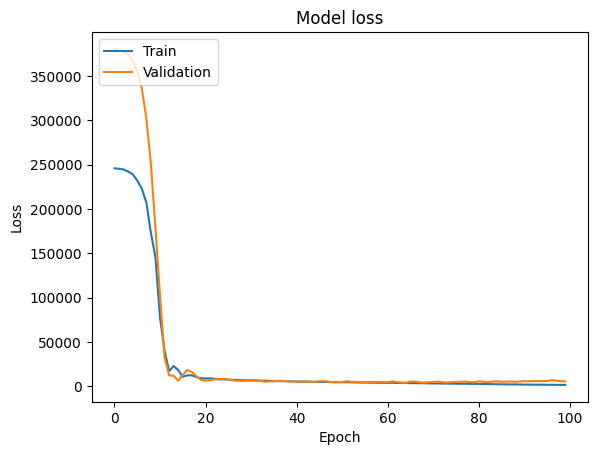

In [25]:
#train the model and plot the training history as training progresses
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
#make predictions on the test set
y_pred = model.predict(X_test_scaled)
#crete a dataframe of the actual and predicted values
df = pd.DataFrame({'Actual DA': y_test['DA Concentration (uM)'], 'Predicted DA': y_pred[:,0], 'Actual AA': y_test['AA Concentration (uM)'], 'Predicted AA': y_pred[:,1]})
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


,Actual DA,Predicted DA,Actual AA,Predicted AA
13,0,-1.387679,1750,1756.753784
39,200,102.546173,200,351.108093
30,75,60.557594,0,2.921412
45,30,27.876892,30,78.254517
17,10,24.965778,0,4.070581


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('DA Concentration Prediction', 'AA Concentration Prediction')
)


# DA Concentration Plot
fig.add_trace(
    go.Scatter(
        x=y_test['DA Concentration (uM)'],
        y=y_pred[:, 0],
        mode='markers',
        name='DA Predictions',
        marker=dict(color='blue', opacity=0.6),
        hovertemplate='Actual: %{x:.2f}<br>Predicted: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Perfect prediction line for DA
fig.add_trace(
    go.Scatter(
        x=[y_test['DA Concentration (uM)'].min(), y_test['DA Concentration (uM)'].max()],
        y=[y_test['DA Concentration (uM)'].min(), y_test['DA Concentration (uM)'].max()],
        mode='lines',
        name='Perfect Prediction (DA)',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=1
)

# AA Concentration Plot
fig.add_trace(
    go.Scatter(
        x=y_test['AA Concentration (uM)'],
        y=y_pred[:, 1],
        mode='markers',
        name='AA Predictions',
        marker=dict(color='green', opacity=0.6),
        hovertemplate='Actual: %{x:.2f}<br>Predicted: %{y:.2f}<extra></extra>'
    ),
    row=1, col=2
)

# Perfect prediction line for AA
fig.add_trace(
    go.Scatter(
        x=[y_test['AA Concentration (uM)'].min(), y_test['AA Concentration (uM)'].max()],
        y=[y_test['AA Concentration (uM)'].min(), y_test['AA Concentration (uM)'].max()],
        mode='lines',
        name='Perfect Prediction (AA)',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='ANN Model: Actual vs Predicted Concentrations',
    width=1200,
    height=600,
    showlegend=True,
    hovermode='closest'
)

# Update axes labels and annotations
fig.update_xaxes(title_text='Actual DA Concentration (µM)', row=1, col=1)
fig.update_yaxes(title_text='Predicted DA Concentration (µM)', row=1, col=1)
fig.update_xaxes(title_text='Actual AA Concentration (µM)', row=1, col=2)
fig.update_yaxes(title_text='Predicted AA Concentration (µM)', row=1, col=2)


# Show the plot
fig.show()